In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [4]:
import platform 

platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2023/"


manifest_path = os.path.join(data_root,'allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json') 

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

sessions = cache.get_session_table() #session_table is a pandas dataframe object

sessions.head()



,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [13]:
#provide the number of unique specimens in the session table
print('Number of unique specimens in the session table: ' + str(len(sessions.specimen_id.unique())))

brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]

#count the number of unique full_genotype values in the session table
print('Number of unique full_genotype values in the session table: ' + str(len(sessions.full_genotype.unique())))

#provide the number of unique session_type values in the session table
print(cache.get_all_session_types())

#for each unique full_genotype value, count the number of sessions with that value
print('Number of sessions with each unique full_genotype value:')
print(sessions.full_genotype.value_counts())


# create a brain_observatory_type_sessions dataframe
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]

#for each unique full_genotype value, count the number of sessions with that value
print('Number of sessions with each unique full_genotype value:')
print(brain_observatory_type_sessions.full_genotype.value_counts())



Number of unique specimens in the session table: 58
Number of unique full_genotype values in the session table: 4
['brain_observatory_1.1', 'functional_connectivity']
Number of sessions with each unique full_genotype value:
wt/wt                                              30
Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt      12
Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt     8
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt       8
Name: full_genotype, dtype: int64
Number of sessions with each unique full_genotype value:
wt/wt                                              16
Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt       6
Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt     5
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt       5
Name: full_genotype, dtype: int64


In [15]:
#store the unique id values of the sessions in the brain_observatory_type_sessions dataframe in a list 
session_ids = brain_observatory_type_sessions.index.values.tolist()

#session_ids is a list of session ids in the brain_observatory_type_sessions dataframe

print('Number of sessions in the brain_observatory_type_sessions dataframe: ' + str(len(session_ids)))

Number of sessions in the brain_observatory_type_sessions dataframe: 32


In [19]:
#create a function that will take in session id and allow the user to access the meta data for that session 
def get_session_data(session_id):
    session_metadata = cache.get_session_data(session_id).metadata
    return session_metadata 

#use the function to access the meta data for the first session in the brain_observatory_type_sessions dataframe
session_1 = get_session_data(session_ids[0]) 

session_1[0]




In [40]:
specific_id = session_1.get('ecephys_session_id') #use the get method to access the value associated with the key 'ecephys_session_id'

#print the value associated with the key 'ecephys_session_id'
print('ecephys_session_id for the first index of session_1: ' + str(session_1.get('ecephys_session_id')))

ecephys_session_id for the first index of session_1: 715093703


In [42]:
#using the specific session id, access the session data for that session 
session_1_data = cache.get_session_data(specific_id)

#how many units are there in the session table?
print('Number of units in the session table: ' + str(len(session_1_data.units)))

Number of units in the session table: 884


884 units total
131 units have snr > 4


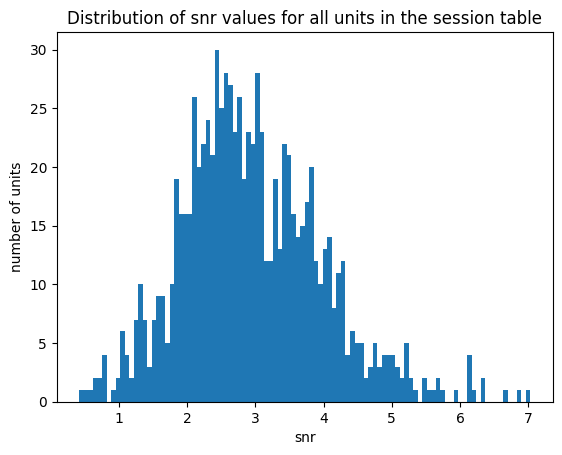

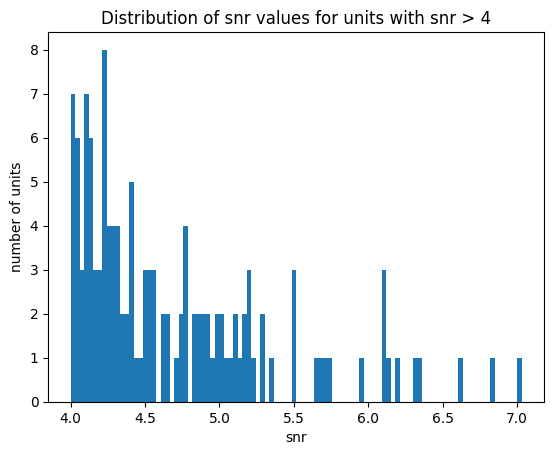

KstestResult(statistic=0.9999683747306906, pvalue=0.0, statistic_location=4.00034374998353, statistic_sign=-1)

In [47]:
print(f'{session_1_data.units.shape[0]} units total') #print the number of units in the session table
units_with_very_high_snr = session_1_data.units[session_1_data.units['snr'] > 4] #create a dataframe of units with snr > 4
print(f'{units_with_very_high_snr.shape[0]} units have snr > 4') #print the number of units with snr > 4

#plot the distribution of snr values for all units in the session table 
plt.hist(session_1_data.units['snr'], bins=100)
plt.xlabel('snr')
plt.ylabel('number of units')
plt.title('Distribution of snr values for all units in the session table')
plt.show()

#test for bimodality of snr values in the session table
from scipy.stats import kstest
kstest(session_1_data.units['snr'], 'norm') #if the p-value is less than 0.05, then the distribution is not normal

#plot the distribution of snr values for units with snr > 4
plt.hist(units_with_very_high_snr['snr'], bins=100)
plt.xlabel('snr')
plt.ylabel('number of units')
plt.title('Distribution of snr values for units with snr > 4')
plt.show()

#test for bimodality of snr values for units with snr > 4 
kstest(units_with_very_high_snr['snr'], 'norm') #if the p-value is less than 0.05, then the distribution is not normal



In [48]:
#create a function that will iterate over the session_ids list, access the session data for each session id, and store the snr values for each session 
# pandas dataframe 

def get_snr_values(session_ids):
    snr_values = pd.DataFrame(columns=['session_id', 'unit_id', 'snr']) #create an empty pandas dataframe with columns 'session_id', 'unit_id', and 'snr'
    
    for session_id in session_ids: #iterate over the session_ids list
        session_data = cache.get_session_data(session_id) #access the session data for each session id
        session_units = session_data.units[['snr']] #create a dataframe with the snr values for each unit in the session
        session_units['unit_id'] = session_units.index #add a column 'unit_id' with the index values of the session_units dataframe
        session_units['session_id'] = session_id #add a column 'session_id' with the current session_id value
        session_units = session_units[['session_id', 'unit_id', 'snr']] #reorder the columns of the session_units dataframe
        snr_values = snr_values.append(session_units) #append the session_units dataframe to the snr_values dataframe
    return snr_values

#use the function to create a dataframe with the snr values for each unit in the session table
snr_values = get_snr_values(session_ids)

#plot the distribution of snr values for all units in the session table
plt.hist(snr_values['snr'], bins=100)

/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_24116/3479032595.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  snr_values = snr_values.append(session_units) #append the session_units dataframe to the snr_values dataframe
